<h3 style="color:red;">Term neonate of 40 weeks of gestation and 3.5 kg at 24 hours</h3>


In [4]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# scale the baseline patient to a gestational age of 40 weeks, 3.568 kg and height 0.512 meters (Fenton Growth Charts p50)
model._scaling.scale_patient(
    weight=3.545,
    height=0.519,
    blood_volume=0.08,
    lung_volume=0.03,
    res_circ_factor=1.20,
    el_base_circ_factor=1.0,
    el_min_circ_factor=1.0,
    el_max_circ_factor=1.0,
    res_resp_factor=1.0,
    el_base_resp_factor=1.0,
    hr_ref=110.0,
    syst_ref=66.0,
    diast_ref=40.0,
    map_ref=51.26,
    resp_rate=40.0,
    vt_rr_ratio=0.0001212,
    mv_ref=0.2,
)

# stabilize the model by calculating 120 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.7 sec. Average model step in 0.0305 ms.


<h5 style="color:red;">Model run results</h5>

In [5]:
neo.validate()

Heart.heart_rate: max  111.39201 min  110.22171
AA.pres         : max    64.9125, min    40.1897 mmHg
PA.pres         : max   41.03903, min   16.94617 mmHg
LV_AA.flow      : net  176.09908, forward  176.09908, backward        0.0 ml/kg/min, stroke volume:    1.60089 ml/kg, 
RV_PA.flow      : net  183.93313, forward  183.93313, backward        0.0 ml/kg/min, stroke volume:    1.67211 ml/kg, 
SVC_RA.flow     : net   76.43051, forward   84.58335, backward   -8.15284 ml/kg/min, stroke volume:    0.69482 ml/kg, 
AAR_AD.flow     : net   97.53147, forward   99.53881, backward   -2.00734 ml/kg/min, stroke volume:    0.88664 ml/kg, 
LV.vol          : max     2.5571, min    0.89008 ml/kg
RV.vol          : max    3.49817, min    1.52159 ml/kg


<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/37095534/">Jhaveri S, Battersby E, Stern KWD, Cohen J, Yang Y, Price A, Hughes E, Poston L, Pasupathy D, Taylor P, Vieira MC, Groves A. Normative ranges of biventricular volumes and function in healthy term newborns. J Cardiovasc Magn Reson. 2023 Apr 24;25(1):26. doi: 10.1186/s12968-023-00932-1. PMID: 37095534; PMCID: PMC10127416.</a><br>
<img src="../documentation/images/JhaveriTable2LV.jpg" width="400" height="500"></img>
<img src="../documentation/images/JhaveriTable3RV.jpg" width="400" height="500"></img><br>

<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="480"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="480"></img><br> -->
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img>



<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
neo.calculate(60)
neo.get_total_blood_volume()
neo.get_vitals()

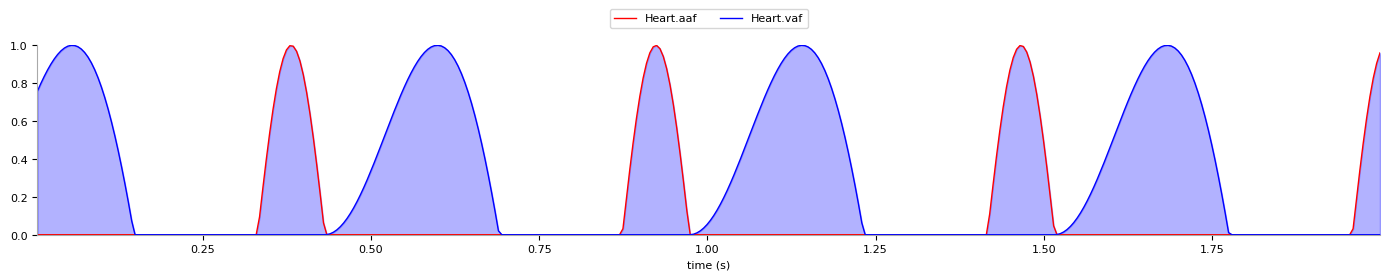

Heart.aaf       : max    0.99951 min        0.0
Heart.vaf       : max    1.00034 min        0.0


In [9]:
neo.plot_time_graph(["Heart.aaf", "Heart.vaf"], time_to_calculate=2)